In [108]:
import os
import sys
import darkfield
import numpy as np
from bash_config import write_bash
from darkfield.diffra_v2 import HOME 

In [170]:
################## DEFINING THE BASH PARAMETERS OF THE SIMULATION ################

upd_params = {
    'n_cpus': 24,
    'mem': '600GB',
    'yaml': 'LP_83.yaml'
} #previously n_cpus=24, mem=650
path = os.path.join(HOME,'bash')
bash_path = write_bash(path, 2000, upd_params)
print(bash_path)


/home/yu79deg/darkfield_p5438/bash/job.slurm


In [171]:
#################### LAUNCHING THE SIMULATION #################
os.system(f"sbatch {bash_path}")

Submitted batch job 3856486


0

In [174]:
#################### VISUALIZING THE QUEUE #################
!squeue --me

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           3846796   hij-gpu jupyterl  yu79deg  R 1-06:45:00      1 gpu004


In [144]:
!scancel 3855167

/home/yu79deg
[1e-11, 50]
 This is outside (-1.01e+02,-2.47e+03):start
 This is outside (-1.00e+02,-2.34e+03):beam_shaper


<Figure size 1000x600 with 0 Axes>

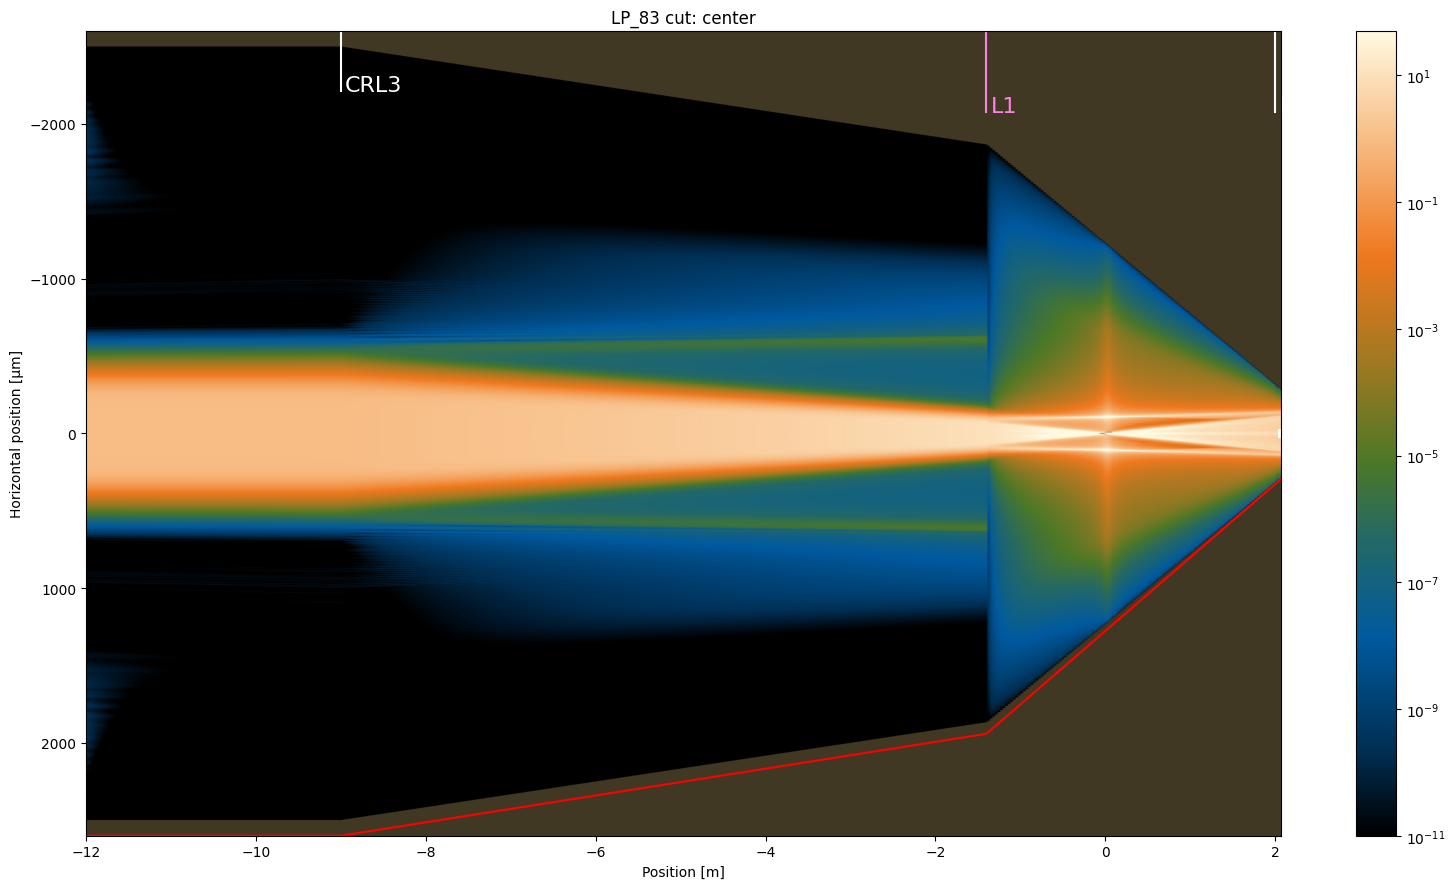

In [175]:
##################### FLOW PLOT OF SIMULATIONS ####################
###################################################################

#from darkfield.diffra_v2 import flow_plot
import importlib
import darkfield.diffra_v2
importlib.reload(darkfield.diffra_v2)
from darkfield.diffra_v2 import flow_plot

#Going back to the root folder :
%cd /home/yu79deg 

project_dir = "darkfield_p5438/Aime"

file = "LP_83" #name of the file

create_video_ff = 1 #create a video from the "ff" images.

############# PLOTTING PARAMETERS ############
cl = [1e-11, 50] #Color scale (min, max) for the pcolor()
gyax_def = [-2600, 2600, 0.1] #vertical axis (start, end, stepsize) (in [um])
vertical_type = 'center' #(center, integral, vert-integral)
log = 1 #log or linear scale (LINEAR SCALE DOESNT WORK)
xl = [-15,15] #horizontal axis limits
xl = None #horizontal axis limits
flow_plot_crange = 1e-5 #relative scale to plot images.

#==================================================#
flow_figs = 0 #save the flow figs (Pretty long to run!)
create_video_ff = 0 #create a video from the saved pictures
#==================================================#

# Call the function
flow_plot(project_dir, file, cl=cl, gyax_def=gyax_def,
          vertical_type=vertical_type, log=log, xl=xl,
          flow_figs=flow_figs, flow_plot_crange=flow_plot_crange)



if create_video_ff and flow_figs:
    image_dir = f"darkfield_p5438/Aime/flow_figs/{file}"
    output_file = "movie.mp4"
    framerate = 10
    video_images_path = ""
    input_pattern = f"{image_dir}/ff_%04d.png"
    !ffmpeg -framerate {framerate} -i "{input_pattern}" -c:v libx264 -pix_fmt yuv420p "{image_dir}/{output_file}"

In [ ]:
!ffmpeg -version

In [ ]:
!micromamba install -c conda-forge ffmpeg -y

In [38]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 56.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [scikit-optimize] [scikit-optimize]


In [127]:
######################### GENERATE YAML FILES FOR SCANS ###############

!python /home/yu79deg/darkfield_p5438/yamls/yaml_scan_O2Size.py

173979.44s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Written LP_29.yaml (O2_size=240)
Written LP_30.yaml (O2_size=200)
Written LP_31.yaml (O2_size=120)
Written LP_32.yaml (O2_size=80)
Written LP_33.yaml (O2_size=20)
Written LP_34.yaml (O2_size=0)


In [128]:
######################## RUN ALL THE SIMULATIONS ###################

def get_simulation_list(manual_list=None, start=None, end=None):
    if manual_list:
        return manual_list
    elif start is not None and end is not None:
        return [f"LP_{i}" for i in range(start, end + 1)]
    else:
        raise ValueError("Either provide a manual list or a start and end value.")

###################### Option 1: manual list #######################
#sim_names = get_simulation_list(manual_list=["LP_30", "LP_31", "LP_35"])

#################### Option 2: auto-generated list #################
sim_names = get_simulation_list(start=29, end=34)

################### Parameters for SLURM submission ################
upd_params = {
    'n_cpus': 24,
    'mem': '600GB',
}

# Folder for bash scripts
path = os.path.join(HOME, 'bash')

#################### Loop over all simulation names ################
for sim in sim_names:
    upd_params['yaml'] = sim + '.yaml'  # Assign current yaml file
    bash_path = write_bash(path, 8000, upd_params)
    print(f"Submitting {sim} with bash file: {bash_path}")
    os.system(f"sbatch {bash_path}")


!squeue --me # See that all simulations are indeed running.


Submitting LP_29 with bash file: /home/yu79deg/darkfield_p5438/bash/job.slurm
Submitted batch job 3794505
Submitting LP_30 with bash file: /home/yu79deg/darkfield_p5438/bash/job.slurm
Submitted batch job 3794506
Submitting LP_31 with bash file: /home/yu79deg/darkfield_p5438/bash/job.slurm
Submitted batch job 3794507
Submitting LP_32 with bash file: /home/yu79deg/darkfield_p5438/bash/job.slurm
Submitted batch job 3794508
Submitting LP_33 with bash file: /home/yu79deg/darkfield_p5438/bash/job.slurm
Submitted batch job 3794509
Submitting LP_34 with bash file: /home/yu79deg/darkfield_p5438/bash/job.slurm
Submitted batch job 3794510


174035.44s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           3794505   hij-gpu    LP_29  yu79deg PD       0:00      1 (Priority)
           3794506   hij-gpu    LP_30  yu79deg PD       0:00      1 (Priority)
           3794507   hij-gpu    LP_31  yu79deg PD       0:00      1 (Priority)
           3794508   hij-gpu    LP_32  yu79deg PD       0:00      1 (Priority)
           3794509   hij-gpu    LP_33  yu79deg PD       0:00      1 (Priority)
           3794510   hij-gpu    LP_34  yu79deg PD       0:00      1 (Priority)
           3776236   hij-gpu jupyterl  yu79deg  R 2-17:58:38      1 gpu001


In [129]:
!squeue --me # See that all simulations are indeed running.

174054.38s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           3794505   hij-gpu    LP_29  yu79deg PD       0:00      1 (Priority)
           3794506   hij-gpu    LP_30  yu79deg PD       0:00      1 (Priority)
           3794507   hij-gpu    LP_31  yu79deg PD       0:00      1 (Priority)
           3794508   hij-gpu    LP_32  yu79deg PD       0:00      1 (Priority)
           3794509   hij-gpu    LP_33  yu79deg PD       0:00      1 (Priority)
           3794510   hij-gpu    LP_34  yu79deg PD       0:00      1 (Priority)
           3776236   hij-gpu jupyterl  yu79deg  R 2-17:58:57      1 gpu001


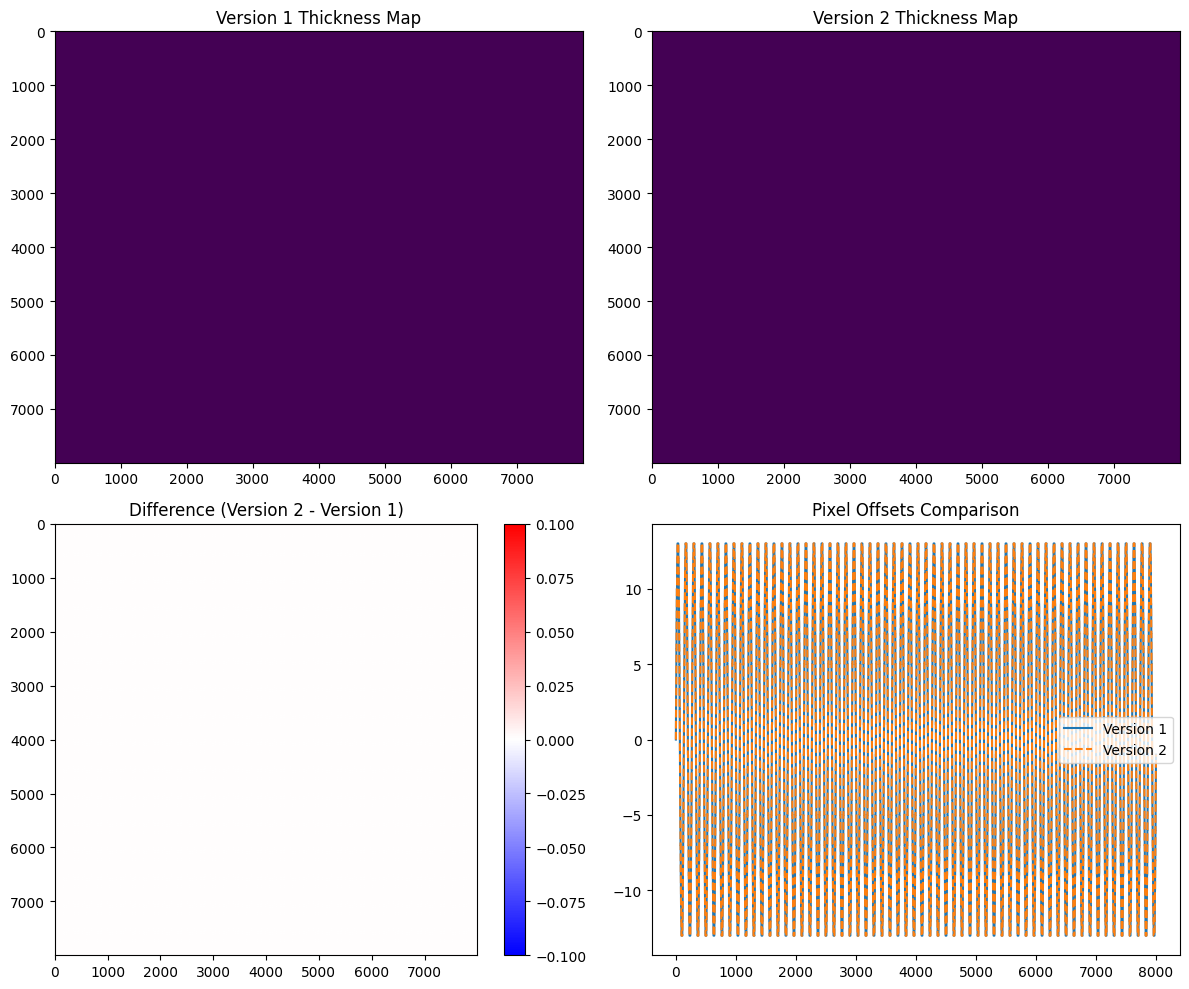

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parameters
N = 8000
prop_size = 0.0012 #in [m]
pxsize = prop_size / N
Na = (np.arange(N) - int(N/2)) * pxsize
amplitude = 2.0e-06
wavelength = 1.9999999999999998e-05

# Initialize base thicknessmap
thicknessmap = np.ones((N, N))

# --- Version 1 (original with transpose and per-element int()) ---
def version_1(thicknessmap):
    offsets = np.sin(Na * (2 * 3.1415 / wavelength)) * amplitude
    offsets_px = np.round(offsets / pxsize)
    tmp = thicknessmap * 0
    for yi in np.arange(N):
        op = int(offsets_px[yi])
        a = np.roll(np.transpose(np.array(thicknessmap[:, yi])), op)
        tmp[:, yi] = np.transpose(a)
    return tmp, offsets_px

# --- Version 2 (cleaner version with astype(int)) ---
def version_2(thicknessmap):
    x = Na * 2 * np.pi / wavelength
    offsets_m = np.sin(x) * amplitude
    offsets_px = np.round(offsets_m / pxsize).astype(int)
    tmp = np.zeros_like(thicknessmap)
    for yi in range(N):
        tmp[:, yi] = np.roll(thicknessmap[:, yi], offsets_px[yi])
    return tmp, offsets_px

# Run both versions
map1, offsets1 = version_1(thicknessmap)
map2, offsets2 = version_2(thicknessmap)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].imshow(map1, cmap='viridis', aspect='auto')
axs[0, 0].set_title("Version 1 Thickness Map")

axs[0, 1].imshow(map2, cmap='viridis', aspect='auto')
axs[0, 1].set_title("Version 2 Thickness Map")

im = axs[1, 0].imshow(map2 - map1, cmap='bwr', aspect='auto')
axs[1, 0].set_title("Difference (Version 2 - Version 1)")
fig.colorbar(im, ax=axs[1, 0])

axs[1, 1].plot(offsets1, label="Version 1")
axs[1, 1].plot(offsets2, label="Version 2", linestyle='--')
axs[1, 1].set_title("Pixel Offsets Comparison")
axs[1, 1].legend()

plt.tight_layout()
plt.show()
